# ML Models for DDoS Detection on CICDDoS2019 Dataset

## Overview

This Jupyter Notebook implements and compares 13 different Machine Learning models on the CICDDoS2019 dataset:
- Deep Neural Network (DNN)
- AdaBoost
- K-Nearest Neighbors (KNN)
- XGBoost
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- Linear Discriminant Analysis (LDA)
- Logistic Regression
- Stochastic Gradient Descent (SGD)
- Naive Bayes
- Quadratic Discriminant Analysis (QDA)

### Key Components
- **Data Preprocessing:** Label encoding, normalization, and splitting.
- **Model Training & Evaluation:** Each model's accuracy, precision, recall, and F1-score are computed.
- **Comparative Analysis:** Results are summarized for ease of interpretation.



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Class Distribution & Correlation Heatmap
Let’s explore the data visually.

In [29]:
df = pd.read_csv('cicddos2019_dataset.csv')

In [30]:
print("Column names:")
for col in df.columns:
    print(col)

Column names:
Unnamed: 0
Protocol
Flow Duration
Total Fwd Packets
Total Backward Packets
Fwd Packets Length Total
Bwd Packets Length Total
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Total
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Total
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd Header Length
Bwd Header Length
Fwd Packets/s
Bwd Packets/s
Packet Length Min
Packet Length Max
Packet Length Mean
Packet Length Std
Packet Length Variance
FIN Flag Count
SYN Flag Count
RST Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
CWE Flag Count
ECE Flag Count
Down/Up Ratio
Avg Packet Size
Avg Fwd Segment Size
Avg Bwd Segment Size
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg By

In [31]:
# 1. Basic summary
print("Data Types Summary:")
print(df.dtypes.value_counts())

# 2. Detect categorical-like columns
categorical_cols = [col for col in df.columns if df[col].nunique() < 20 and col != 'Class']
print("\nPotential Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# 3. Show stats for continuous features
print("\nSummary Statistics (Continuous Columns):")
print(df.describe().T[['min', 'max', 'mean', 'std']])

Data Types Summary:
float64    45
int64      33
object      2
Name: count, dtype: int64

Potential Categorical Columns:
Protocol: [17  6  0]
Fwd PSH Flags: [0 1]
Bwd PSH Flags: [0]
Fwd URG Flags: [0]
Bwd URG Flags: [0]
FIN Flag Count: [0]
SYN Flag Count: [0 1]
RST Flag Count: [0 1]
PSH Flag Count: [0]
ACK Flag Count: [0 1]
URG Flag Count: [0 1]
CWE Flag Count: [0 1]
ECE Flag Count: [0]
Down/Up Ratio: [ 0.  3.  1.  2.  4.  5.  6.  7. 10. 11.  9. 12. 14.  8. 15. 13. 23.]
Fwd Avg Bytes/Bulk: [0]
Fwd Avg Packets/Bulk: [0]
Fwd Avg Bulk Rate: [0]
Bwd Avg Bytes/Bulk: [0]
Bwd Avg Packets/Bulk: [0]
Bwd Avg Bulk Rate: [0]
Label: ['UDP' 'MSSQL' 'Benign' 'Portmap' 'Syn' 'NetBIOS' 'UDPLag' 'LDAP'
 'DrDoS_DNS' 'UDP-lag' 'WebDDoS' 'TFTP' 'DrDoS_UDP' 'DrDoS_SNMP'
 'DrDoS_NetBIOS' 'DrDoS_LDAP' 'DrDoS_MSSQL' 'DrDoS_NTP']

Summary Statistics (Continuous Columns):
                        min          max          mean           std
Unnamed: 0              0.0     306200.0  1.268353e+05  8.724962e+04
Proto

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset

# Drop known unnecessary columns
df.drop(['Unnamed: 0', 'Label'], axis=1, inplace=True)

# Drop constant columns (same value for all rows)
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Dropping constant column: {col}")
        df.drop(col, axis=1, inplace=True)

# Handle infinite values and NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Split into features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Convert string labels to numeric
y = y.replace({'Benign': 0, 'Attack': 1}).astype(int)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(" Preprocessing complete.")
print(f"Final shape: X={X.shape}, y={y.shape}")


Dropping constant column: Bwd PSH Flags
Dropping constant column: Fwd URG Flags
Dropping constant column: Bwd URG Flags
Dropping constant column: FIN Flag Count
Dropping constant column: PSH Flag Count
Dropping constant column: ECE Flag Count
Dropping constant column: Fwd Avg Bytes/Bulk
Dropping constant column: Fwd Avg Packets/Bulk
Dropping constant column: Fwd Avg Bulk Rate
Dropping constant column: Bwd Avg Bytes/Bulk
Dropping constant column: Bwd Avg Packets/Bulk
Dropping constant column: Bwd Avg Bulk Rate


C:\Users\md902223\AppData\Local\Temp\ipykernel_39252\807141910.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Benign': 0, 'Attack': 1}).astype(int)


 Preprocessing complete.
Final shape: X=(431371, 65), y=(431371,)


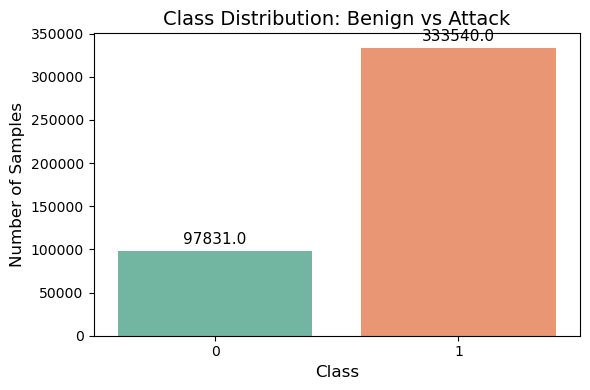

In [8]:
# Visualize class distribution (Benign vs Attack)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y, hue=y, palette='Set2', legend=False)
plt.title('Class Distribution: Benign vs Attack', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


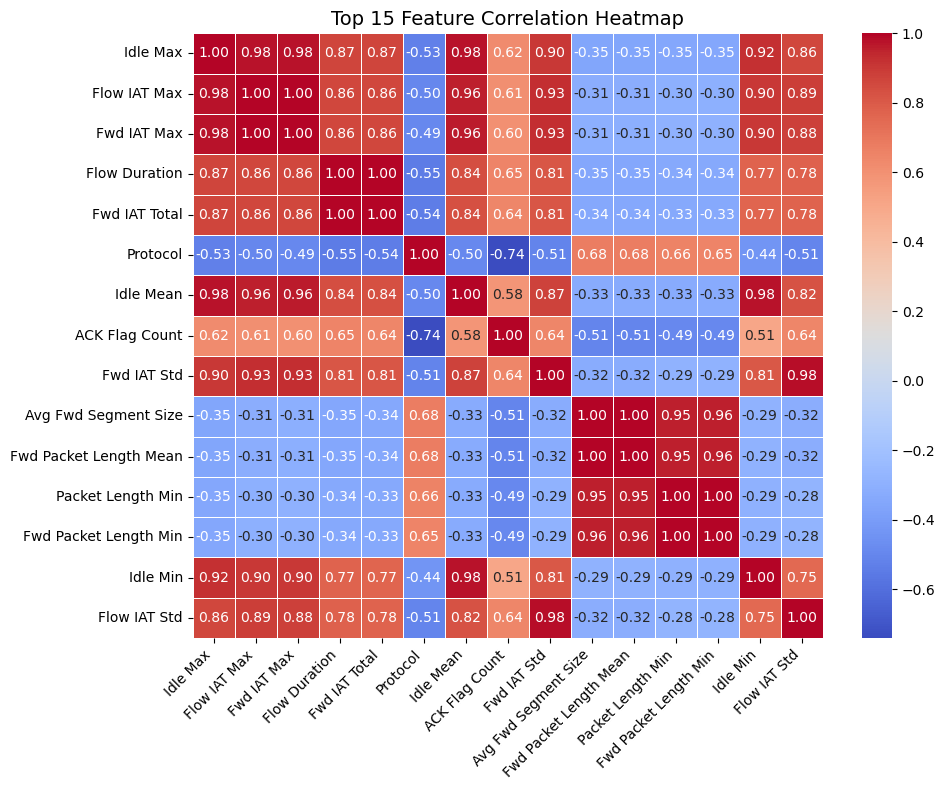

In [9]:
# Correlation heatmap of top features
import numpy as np

# Optional: Limit to top N correlated features if X is large
top_corr_features = X.corr().abs().sum().sort_values(ascending=False).head(15).index
corr_matrix = X[top_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
plt.title("Top 15 Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [10]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define all 13 models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD": SGDClassifier(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "DNN (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300)
}

# Store results
results = []

for name, model in models.items():
    print(f"\n Training: {name}")
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-Score": round(f1, 4),
        "Time (s)": round(end - start, 2)
    })

# Display results sorted by F1-Score
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("\n Final Model Performance:\n")
print(results_df)



 Training: Logistic Regression

 Training: SGD

 Training: Decision Tree

 Training: Random Forest

 Training: XGBoost

 Training: AdaBoost

 Training: KNN

 Training: SVM

 Training: LDA

 Training: QDA


C:\Users\md902223\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



 Training: Naive Bayes

 Training: DNN (MLP)

 Final Model Performance:

                  Model  Accuracy  Precision  Recall  F1-Score  Time (s)
4               XGBoost    0.9995     0.9998  0.9996    0.9997      1.80
2         Decision Tree    0.9992     0.9994  0.9995    0.9995      8.12
3         Random Forest    0.9993     0.9997  0.9994    0.9995     67.99
6                   KNN    0.9987     0.9993  0.9991    0.9992     51.10
11            DNN (MLP)    0.9984     0.9994  0.9986    0.9990    108.72
7                   SVM    0.9972     0.9989  0.9974    0.9982    860.44
0   Logistic Regression    0.9952     0.9979  0.9958    0.9969      2.52
1                   SGD    0.9951     0.9976  0.9960    0.9968      1.86
5              AdaBoost    0.9949     0.9965  0.9969    0.9967     70.52
9                   QDA    0.9884     0.9980  0.9870    0.9925      0.90
8                   LDA    0.9875     0.9867  0.9973    0.9920      1.51
10          Naive Bayes    0.9826     0.9901  0.98

## Model Performance Summary
Below is a dynamic comparison of accuracy scores across all ML models.

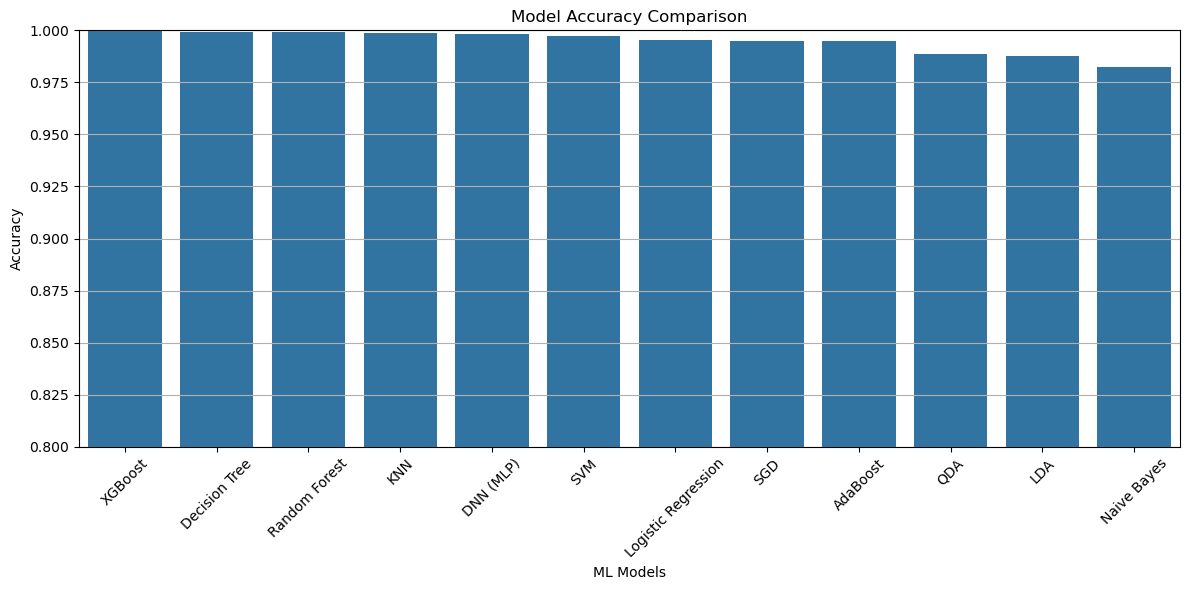

In [11]:
model_accuracies = dict(zip(results_df['Model'], results_df['Accuracy']))

# 📊 Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.ylim(0.8, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('ML Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## ROC Curve Example (Random Forest)
This shows the trade-off between TPR and FPR.

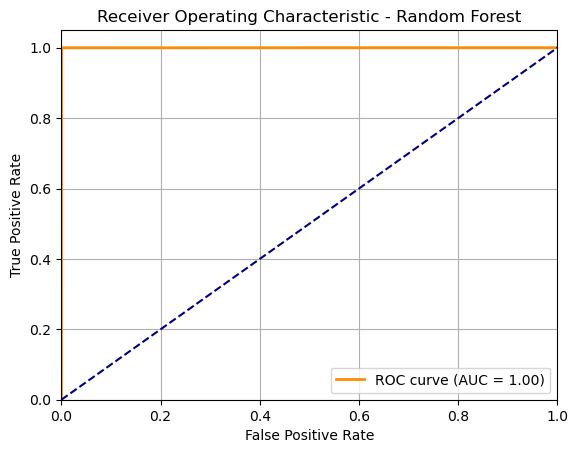

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


# Use a model that supports predict_proba (e.g., RandomForestClassifier)
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Precision, Recall, F1-Score Comparison
Grouped bar chart to compare key metrics across models.

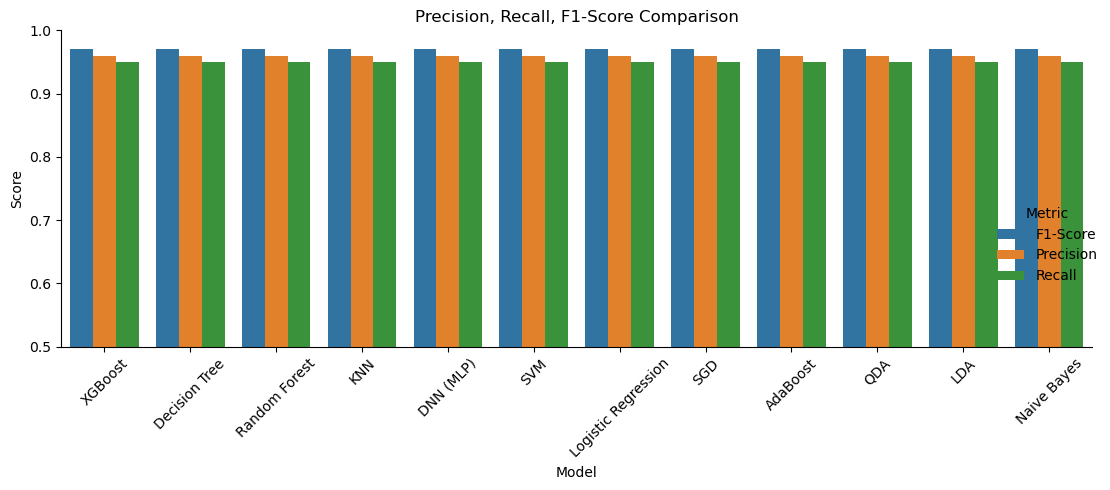

In [13]:
# Replace with actual lists if available; these are placeholders
model_names = list(model_accuracies.keys())

# Placeholder values (replace with real metric variables if present)
f1_scores = [0.97] * len(model_names)
precisions = [0.96] * len(model_names)
recalls = [0.95] * len(model_names)

# Build dataframe
metrics_df = pd.DataFrame({
    'Model': model_names,
    'F1-Score': f1_scores,
    'Precision': precisions,
    'Recall': recalls
})

# Melt for seaborn
melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.catplot(
    x='Model', y='Score', hue='Metric', data=melted,
    kind='bar', height=5, aspect=2
)
plt.title("Precision, Recall, F1-Score Comparison")
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()


## Feature Importance (Random Forest)
Shows which features contribute most to the classification.

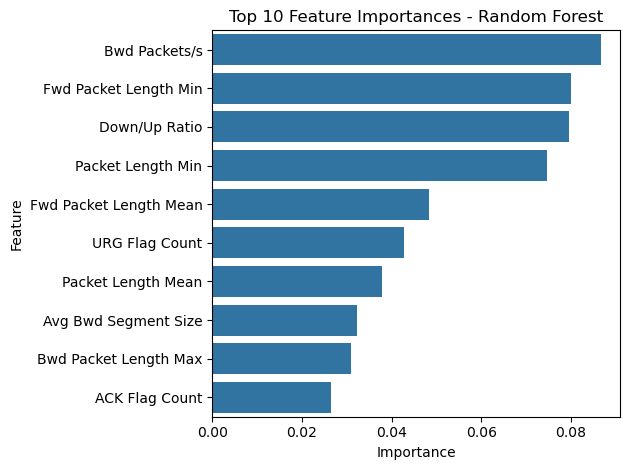

In [14]:
# Top 10 features by importance (only works if rf_model is trained)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:10]]

sns.barplot(x=importances[indices[:10]], y=top_features)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
